In [3]:
# prompt: import spam.csv with encoding latin 1

import pandas as pd

# Replace 'spam.csv' with the actual file path if needed.
df = pd.read_csv('spam.csv', encoding='latin-1')
print(df.head())


     v1                                                 v2 Unnamed: 2  \
0   ham  Go until jurong point, crazy.. Available only ...        NaN   
1   ham                      Ok lar... Joking wif u oni...        NaN   
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3   ham  U dun say so early hor... U c already then say...        NaN   
4   ham  Nah I don't think he goes to usf, he lives aro...        NaN   

  Unnamed: 3 Unnamed: 4  
0        NaN        NaN  
1        NaN        NaN  
2        NaN        NaN  
3        NaN        NaN  
4        NaN        NaN  


# Data Cleaning


In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [5]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [5]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [6]:
df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df.sample(5)


,target,text
3438,ham,"awesome, how do I deal with the gate? Charles ..."
2727,ham,Whatsup there. Dont u want to sleep
4879,ham,alright tyler's got a minor crisis and has to ...
4316,ham,HIYA STU WOT U UP 2.IM IN SO MUCH TRUBLE AT HO...
5093,ham,Gokila is talking with you aha:)


In [7]:
# prompt: import sk learn  preprosser and lable encoding to df['target']

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['target'] = le.fit_transform(df['target'])
df.head()


,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
# prompt: show missing values

df.isnull().sum()


,0
target,0
text,0


In [9]:
# prompt: check duplicate values

df.duplicated().sum()


403

In [10]:
# prompt: remove duplicates

df = df.drop_duplicates(keep='first')
df.duplicated().sum()


0

In [11]:
df.shape

#

(5169, 2)

# EDA

In [12]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [13]:
df['target'].value_counts()

,count
target,
0,4516
1,653


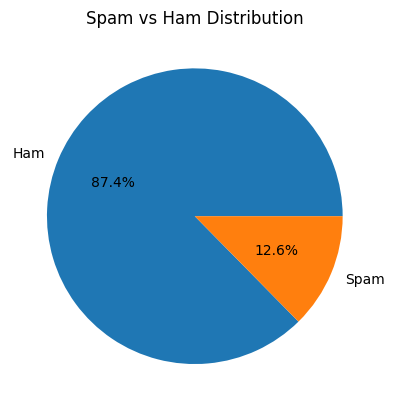

In [14]:
# prompt: import matplotlib and make pie plot  of df['target'] and lable data as spam and ham

import matplotlib.pyplot as plt

# Create the pie chart
plt.pie(df['target'].value_counts(), labels=['Ham', 'Spam'], autopct='%1.1f%%')
plt.title('Spam vs Ham Distribution')
plt.show()


In [15]:
# prompt: show me how data is imblanced

print(df['target'].value_counts())


target
0    4516
1     653
Name: count, dtype: int64


In [16]:
# prompt: import nltk download punkt make a df of number of characters =  df number of text and apply len

!pip install nltk
import nltk
nltk.download('punkt')

# Calculate the number of characters in each text
df['num_characters'] = df['text'].apply(len)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [17]:
df.head()
#

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


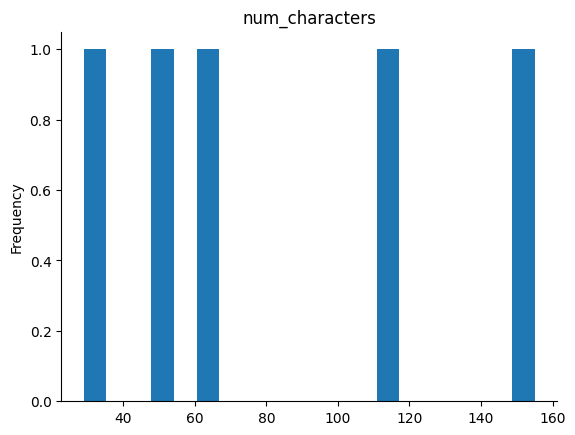

In [19]:
from matplotlib import pyplot as plt
_df_1['num_characters'].plot(kind='hist', bins=20, title='num_characters')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [18]:
# prompt: by using nltk word tokenize  make a df of number of  words  = number of text  and show data frame

import nltk
from nltk.tokenize import word_tokenize

# Apply word_tokenize to the 'text' column
df['num_words'] = df['text'].apply(lambda x: len(word_tokenize(x)))

# Display the DataFrame
df.head()


,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [19]:
# prompt: by using nltk word tokenize  make a df of number of  sentences  = number of text  and show data frame

import nltk
from nltk.tokenize import sent_tokenize

# Assuming 'df' is your DataFrame

# Apply sent_tokenize to the 'text' column
df['num_sentences'] = df['text'].apply(lambda x: len(sent_tokenize(x)))

# Display the DataFrame
df.head()


,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [20]:
# prompt: make a df of number of words and number of characters and number of sentences and describe it

# Create a new DataFrame with the desired columns
df[['num_words', 'num_characters', 'num_sentences']].describe()


,num_words,num_characters,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,18.455794,78.977945,1.965564
std,13.324758,58.236293,1.448541
min,1.000000,2.000000,1.000000
25%,9.000000,36.000000,1.000000
50%,15.000000,60.000000,1.000000
75%,26.000000,117.000000,2.000000
max,220.000000,910.000000,38.000000


In [21]:
# prompt: for ham take df ['target'] == 0   and select columns of number of words and sentences number of characters

# Filter for ham messages
df[df['target'] == 0][['num_words', 'num_sentences', 'num_characters']].describe()


,num_words,num_sentences,num_characters
count,4516.000000,4516.000000,4516.000000
mean,17.123782,1.820195,70.459256
std,13.493970,1.383657,56.358207
min,1.000000,1.000000,2.000000
25%,8.000000,1.000000,34.000000
50%,13.000000,1.000000,52.000000
75%,22.000000,2.000000,90.000000
max,220.000000,38.000000,910.000000


In [22]:
# prompt: df[df['target'] == 1][['num_words', 'num_sentences', 'num_characters']].describe()

df[df['target'] == 1][['num_words', 'num_sentences', 'num_characters']].describe()


,num_words,num_sentences,num_characters
count,653.000000,653.000000,653.000000
mean,27.667688,2.970904,137.891271
std,7.008418,1.488425,30.137753
min,2.000000,1.000000,13.000000
25%,25.000000,2.000000,132.000000
50%,29.000000,3.000000,149.000000
75%,32.000000,4.000000,157.000000
max,46.000000,9.000000,224.000000


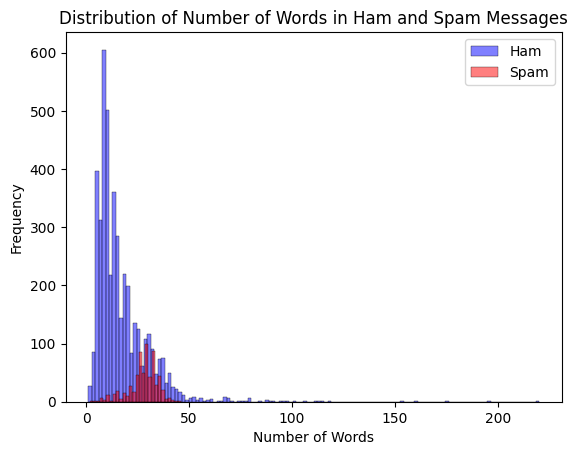

In [23]:
# prompt: import seaborn and make a histplot of  df ['target] == 0 and df['target] == 1  color red combine both

import matplotlib.pyplot as plt
import seaborn as sns

# Create a histogram for ham messages
sns.histplot(df[df['target'] == 0]['num_words'], color='blue', label='Ham', alpha=0.5)

# Create a histogram for spam messages
sns.histplot(df[df['target'] == 1]['num_words'], color='red', label='Spam', alpha=0.5)

plt.legend()
plt.title('Distribution of Number of Words in Ham and Spam Messages')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.show()


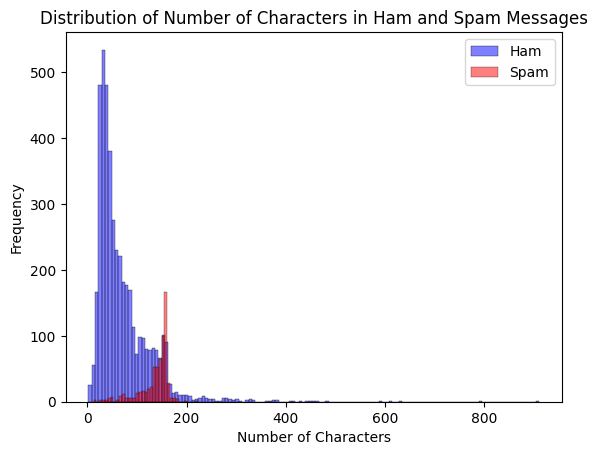

In [24]:
# prompt: now make a hisplot of df['target]  on number of chaaracters number of character , and color of number of character  should be red and other is blue

import matplotlib.pyplot as plt
# Create a histogram for ham messages
sns.histplot(df[df['target'] == 0]['num_characters'], color='blue', label='Ham', alpha=0.5)

# Create a histogram for spam messages
sns.histplot(df[df['target'] == 1]['num_characters'], color='red', label='Spam', alpha=0.5)

plt.legend()
plt.title('Distribution of Number of Characters in Ham and Spam Messages')
plt.xlabel('Number of Characters')
plt.ylabel('Frequency')
plt.show()


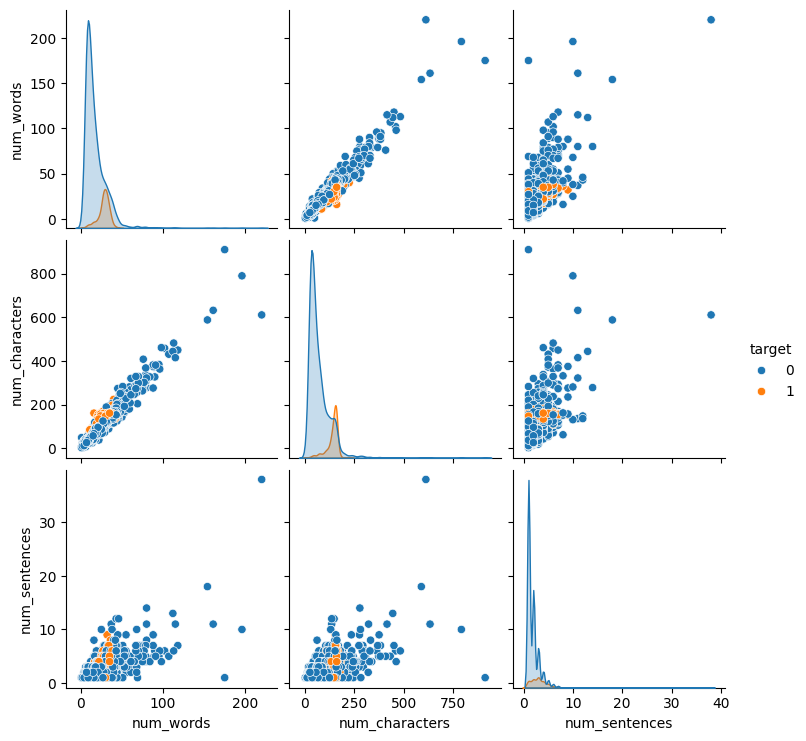

In [25]:
# prompt: make a pairplot hue = ['target']

import matplotlib.pyplot as plt
sns.pairplot(df[['num_words', 'num_characters', 'num_sentences', 'target']], hue='target')
plt.show()


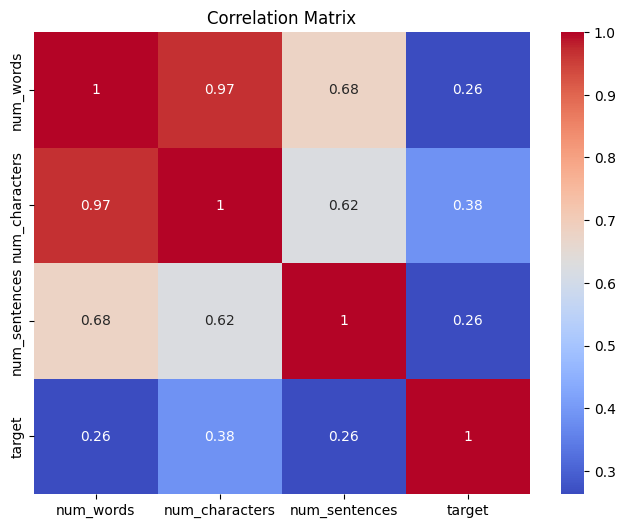

In [29]:
# prompt: make  heat map df corr anot = true

import matplotlib.pyplot as plt
# Calculate the correlation matrix
corr_matrix = df[['num_words', 'num_characters', 'num_sentences', 'target']].corr()

# Create the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


In [31]:
# prompt: do data preprocessing  Lower case
# Tokenization
# Removing special characters
# Removing stop words and punctuation
# Stemming

import nltk
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import string

nltk.download('punkt')
nltk.download('stopwords')

from nltk.tokenize import word_tokenize

nltk.download('stopwords')
nltk.download('punkt')

ps = PorterStemmer()

def transform_text(text):
    text = text.lower()
    text = re.sub('[^a-zA-Z0-9\s]', '', text)
    text = word_tokenize(text)

    y = []
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    text = y
    y = []
    for i in text:
        y.append(ps.stem(i))

    return " ".join(y)

df['transformed_text'] = df['text'].apply(transform_text)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [32]:
transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.")

'im gon na home soon dont want talk stuff anymor tonight k ive cri enough today'

In [33]:
# prompt: apply the transform text funtion on data fram of  text

df['transformed_text'] = df['text'].apply(transform_text)


In [34]:
df.head()


,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah dont think goe usf live around though


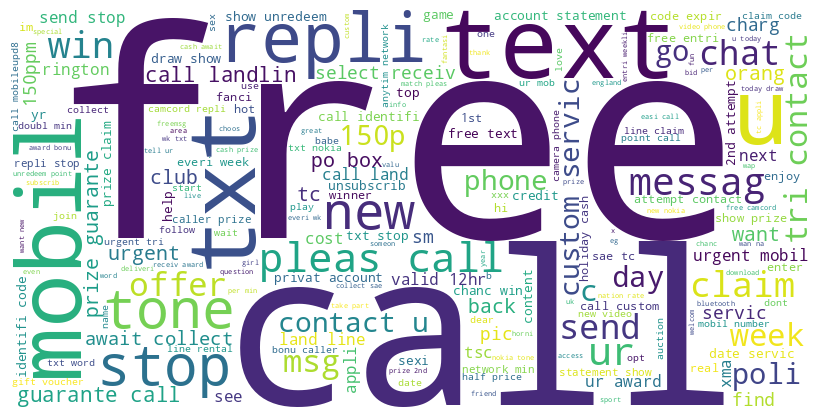

In [35]:
# prompt: make a word cloud of  df['target'] == 1 and transformed text

from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Concatenate all the transformed text for spam messages
spam_text = " ".join(df[df['target'] == 1]['transformed_text'].tolist())

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(spam_text)

# Display the generated image:
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()


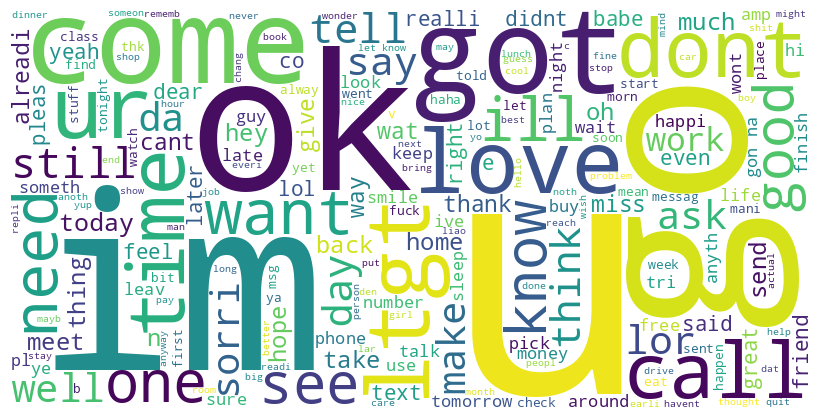

In [36]:
# prompt: make a word cloud of  df['target'] == 0 and transformed text

import matplotlib.pyplot as plt
# Concatenate all the transformed text for ham messages
ham_text = " ".join(df[df['target'] == 0]['transformed_text'].tolist())

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(ham_text)

# Display the generated image:
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()


In [44]:
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [45]:
len(spam_corpus)


10813

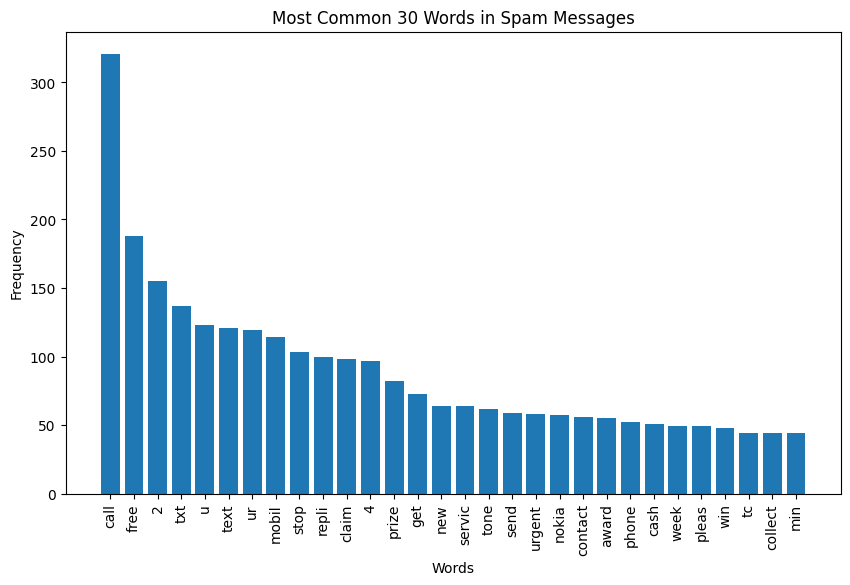

In [46]:
# prompt: from collection import counter make a barplot of spam_corpus  of most common 30 words  rotation vertical

from collections import Counter
import matplotlib.pyplot as plt

# Assuming 'spam_corpus' is defined as in the previous code.

# Get the most common 30 words
most_common_words = Counter(spam_corpus).most_common(30)

# Extract words and counts
words = [word for word, count in most_common_words]
counts = [count for word, count in most_common_words]

# Create the bar plot
plt.figure(figsize=(10, 6))
plt.bar(words, counts)
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.title("Most Common 30 Words in Spam Messages")
plt.xticks(rotation=90)  # Rotate x-axis labels vertically
plt.show()


In [51]:
# prompt: make a ham corpus and make funtion of go through each messages one by one  and spilt in to tiny peices called words

ham_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

# Function to split messages into words
def split_into_words(messages):

  corpus = []
  for msg in messages:
      for word in msg.split():
          corpus.append(word)
  return corpus


In [52]:
len(ham_corpus)

36813

# Model building


In [54]:
# prompt: from sklearn feature extraction import counter vectorization tfidf vectorization cv = counter vectorization tfidf = tfidf vectorization max feature 3000

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)


In [56]:
# prompt: use naive bayes algorithm

X = tfidf.fit_transform(df['transformed_text']).toarray()
y = df['target'].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(X_train, y_train)

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

y_pred = model.predict(X_test)

print('Accuracy score: ', accuracy_score(y_test, y_pred))
print('Precision score: ', precision_score(y_test, y_pred))
print('Recall score: ', recall_score(y_test, y_pred))
print('F1 score: ', f1_score(y_test, y_pred))

print('Confusion matrix: \n', confusion_matrix(y_test, y_pred))


Accuracy score:  0.97678916827853
Precision score:  1.0
Recall score:  0.8260869565217391
F1 score:  0.9047619047619047
Confusion matrix: 
 [[896   0]
 [ 24 114]]


In [57]:
# prompt: now tell who i will deploy this model from git  step by step

# 1. Create a GitHub repository.
#    - Go to GitHub and create a new repository.
#    - Give it a name (e.g., "spam-classifier").
#    - Choose if you want it to be public or private.

# 2. Initialize a Git repository in your project directory.
!git init

# 3. Add your project files to the Git repository.
!git add .

# 4. Commit your changes with a message.
!git commit -m "Initial commit"

# 5. Add the remote URL to your GitHub repository.
!git remote add origin <your_github_repo_url>

# 6. Push your code to the GitHub repository.
!git push -u origin main

# 7. Deploy the model.
#    - Choose a platform to deploy your model (e.g., Heroku, AWS, Google Cloud).
#    - Follow the platform's instructions to deploy your code.
#    - You might need to create a Dockerfile or use a platform-specific deployment tool.
#    - Ensure your deployment includes the necessary dependencies and model files.

# 8. Test your deployed model.
#    - Make sure your deployed model is accessible and functioning correctly.
#    - Send test requests to your deployed model to verify its performance.
